IE5374 17529 ST: Foundations Data Analytics (Group 33)

Project 3

In [ ]:
#Importing all the library required for the project 
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Uploading all the required files 
uploaded = files.upload()

Saving 2020.csv to 2020.csv
Saving 2021.csv to 2021.csv
Saving 2022.csv to 2022.csv
Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving Keyword_data.csv to Keyword_data.csv


In [ ]:
#Creating dataframes for given data files
df= pd.read_csv('Keyword_data.csv')
df_2017=pd.read_csv("2017.csv")
df_2018=pd.read_csv("2018.csv")
df_2019=pd.read_csv("2019.csv")
df_2020=pd.read_csv("2020.csv")
df_2021=pd.read_csv("2021.csv")
df_2022=pd.read_csv("2022.csv")

Task 1

In [ ]:
#removing null rows and converting into lower case
df=df.dropna(thresh=8)
for column in df.columns:
  df[str(column)]=df[str(column)].str.lower()

<ipython-input-4-9b5171de3b7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(column)]=df[str(column)].str.lower()


In [ ]:
#unique keywords 
keywords=set()
for i in range(1,13):
  x=set(df.iloc[:,i].unique())
  keywords=keywords.union(x)

In [ ]:
#removing null unique keywords
keywords.remove(np.nan)

In [ ]:
#creating matrix of len of unique keywords
keywords=list(keywords)
matrix=pd.DataFrame(np.zeros([len(keywords),len(keywords)],dtype=int))
matrix.columns=keywords
matrix.index=keywords
matrix

,job stress,mediation,motion picture authorship,organizational sociology,intrinsic motivation,management styles,executives -- recruiting,international business enterprises -- management,capital investments,incentives in industry,...,executive ability (management),marketing -- decision making,employees -- attitudes -- research,work & family,social psychology,marketing,wages,strategic alliances (business),mass media,employee motivation
job stress,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mediation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
motion picture authorship,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
organizational sociology,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
intrinsic motivation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
marketing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wages,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
strategic alliances (business),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mass media,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adjacency Matrix.

In [ ]:
#creating adjacency matrix
for x in matrix.columns:
  for y in matrix.index:
    count=0
    for z in range(0,len(df)):
      if x==y:
        matrix[str(y)][str(x)]=0
      elif ((x in list(df.iloc[int(z),1:])) & (y in list(df.iloc[int(z),1:]))):
        count+=1
    matrix[str(y)][str(x)]=count

In [ ]:
#Adjacency Matrix.
matrix

,job stress,mediation,motion picture authorship,organizational sociology,intrinsic motivation,management styles,executives -- recruiting,international business enterprises -- management,capital investments,incentives in industry,...,executive ability (management),marketing -- decision making,employees -- attitudes -- research,work & family,social psychology,marketing,wages,strategic alliances (business),mass media,employee motivation
job stress,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
mediation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
motion picture authorship,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
organizational sociology,0,0,0,0,0,0,2,1,0,2,...,0,0,0,0,1,0,0,0,0,2
intrinsic motivation,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
marketing,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
wages,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
strategic alliances (business),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mass media,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Weighted Network

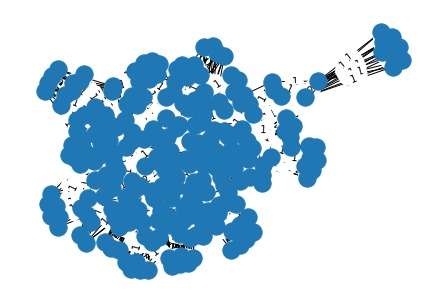

In [ ]:
G=nx.from_numpy_matrix(np.matrix(matrix),parallel_edges=False)
pos=nx.spring_layout(G)
nx.draw(G,pos)
labels=nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

Node Degree

In [ ]:
G.degree

DegreeView({0: 20, 1: 10, 2: 9, 3: 66, 4: 20, 5: 9, 6: 27, 7: 11, 8: 9, 9: 32, 10: 9, 11: 11, 12: 18, 13: 10, 14: 10, 15: 16, 16: 9, 17: 11, 18: 7, 19: 9, 20: 9, 21: 9, 22: 18, 23: 11, 24: 16, 25: 42, 26: 9, 27: 48, 28: 9, 29: 9, 30: 11, 31: 9, 32: 9, 33: 9, 34: 11, 35: 9, 36: 10, 37: 9, 38: 9, 39: 18, 40: 24, 41: 17, 42: 11, 43: 18, 44: 32, 45: 74, 46: 17, 47: 10, 48: 11, 49: 66, 50: 9, 51: 11, 52: 38, 53: 9, 54: 16, 55: 9, 56: 11, 57: 9, 58: 10, 59: 102, 60: 17, 61: 11, 62: 9, 63: 10, 64: 9, 65: 93, 66: 11, 67: 10, 68: 9, 69: 17, 70: 9, 71: 9, 72: 11, 73: 9, 74: 19, 75: 10, 76: 11, 77: 9, 78: 19, 79: 14, 80: 11, 81: 10, 82: 11, 83: 9, 84: 17, 85: 8, 86: 11, 87: 8, 88: 9, 89: 9, 90: 11, 91: 11, 92: 18, 93: 9, 94: 9, 95: 9, 96: 20, 97: 9, 98: 11, 99: 11, 100: 11, 101: 10, 102: 26, 103: 17, 104: 7, 105: 29, 106: 9, 107: 28, 108: 9, 109: 23, 110: 9, 111: 10, 112: 31, 113: 10, 114: 9, 115: 9, 116: 17, 117: 41, 118: 18, 119: 9, 120: 19, 121: 11, 122: 10, 123: 17, 124: 25, 125: 9, 126: 9, 1

Node Strength

In [ ]:
G.degree(weight='weight')

DegreeView({0: 20, 1: 10, 2: 9, 3: 96, 4: 21, 5: 9, 6: 31, 7: 11, 8: 9, 9: 35, 10: 9, 11: 11, 12: 18, 13: 10, 14: 10, 15: 18, 16: 9, 17: 11, 18: 7, 19: 9, 20: 9, 21: 9, 22: 20, 23: 11, 24: 18, 25: 47, 26: 9, 27: 60, 28: 9, 29: 9, 30: 11, 31: 9, 32: 9, 33: 9, 34: 11, 35: 9, 36: 10, 37: 9, 38: 9, 39: 19, 40: 28, 41: 18, 42: 11, 43: 19, 44: 37, 45: 107, 46: 19, 47: 10, 48: 11, 49: 80, 50: 9, 51: 11, 52: 48, 53: 9, 54: 17, 55: 9, 56: 11, 57: 9, 58: 10, 59: 136, 60: 18, 61: 11, 62: 9, 63: 10, 64: 9, 65: 126, 66: 11, 67: 10, 68: 9, 69: 19, 70: 9, 71: 9, 72: 11, 73: 9, 74: 20, 75: 10, 76: 11, 77: 9, 78: 20, 79: 15, 80: 11, 81: 10, 82: 11, 83: 9, 84: 18, 85: 8, 86: 11, 87: 8, 88: 9, 89: 9, 90: 11, 91: 11, 92: 20, 93: 9, 94: 9, 95: 9, 96: 20, 97: 9, 98: 11, 99: 11, 100: 11, 101: 10, 102: 27, 103: 18, 104: 7, 105: 31, 106: 9, 107: 30, 108: 9, 109: 29, 110: 9, 111: 10, 112: 37, 113: 10, 114: 9, 115: 9, 116: 18, 117: 53, 118: 18, 119: 9, 120: 22, 121: 11, 122: 10, 123: 19, 124: 25, 125: 9, 126: 9,

In [ ]:
df1=pd.DataFrame(columns=['Keyword','degree','strength'])

In [ ]:
strength=[]
deg=[]
for i,j in G.degree(weight='weight'):
  strength.append(j)
for i,j in G.degree:
  deg.append(j)

In [ ]:
df1['Keyword']=keywords
df1['strength']=strength
df1['degree']=deg

Top 10 nodes by degree.

In [ ]:
df1.sort_values(by='degree',ascending=False).iloc[0:10,:2]

,Keyword,degree
161,organizational behavior,166
189,organizational effectiveness,104
59,management science,102
65,personnel management,93
216,decision making,88
45,organizational structure,74
3,organizational sociology,66
49,strategic planning,66
232,corporate governance,62
221,industrial management,62


Top 10 nodes by strength.

In [ ]:
df1.sort_values(by='strength',ascending=False).drop('degree',axis=1).iloc[0:10,:]

,Keyword,strength
161,organizational behavior,265
189,organizational effectiveness,144
59,management science,136
65,personnel management,126
216,decision making,108
45,organizational structure,107
3,organizational sociology,96
232,corporate governance,85
49,strategic planning,80
221,industrial management,80


In [ ]:
df2=pd.DataFrame(columns=['Keyword1','Keyword2','weight'])

In [ ]:
mat=dict(matrix.max())
key1=[]
nodeweight=[]
for i,j in mat.items():
  key1.append(i)
  nodeweight.append(j)
key2=[]
for k,v in mat.items():
  key2.append(matrix[matrix[k].where(matrix[k]==v).notnull()].index[0])  

In [ ]:
df2['Keyword1']=key1
df2['Keyword2']=key2
df2['weight']=nodeweight
df2 = df2.loc[pd.DataFrame(np.sort(df2[['Keyword1','Keyword2']],1),index=df2.index).drop_duplicates(keep='first').index].reset_index()
df2 = df2.drop('index', axis = 1)

Top 10 node pairs by weight.

In [ ]:
df2.head(10)

,Keyword1,Keyword2,weight
0,job stress,intrinsic motivation,1
1,mediation,conflict management,1
2,motion picture authorship,management science,1
3,organizational sociology,organizational behavior,6
4,intrinsic motivation,organizational behavior,2
5,management styles,charismatic authority,1
6,executives -- recruiting,organizational sociology,2
7,international business enterprises -- management,organizational sociology,1
8,capital investments,executive succession,1
9,incentives in industry,organizational sociology,2


Degree vs Average Strength

Text(0, 0.5, 'Average Strength')

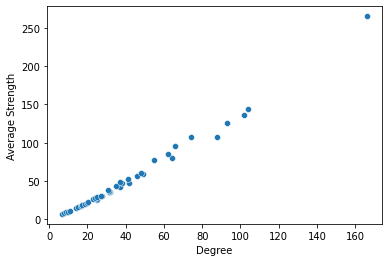

In [ ]:
# Degree vs Average Strength.
plot=df1.groupby('strength').mean()
sns.scatterplot(data=plot,y=plot.index,x='degree')
plt.xlabel('Degree')
plt.ylabel('Average Strength')

Task 2

2017 DATA

In [ ]:
df_2017_tweets=df_2017.tweet.to_frame()
df_2017_tweets

,tweet
0,@neilsiegel @Tesla Coming very soon
1,@Kreative Vastly better maps/nav coming soon
2,@dd_hogan Ok
3,@Jason @Tesla Sure
4,"@kabirakhtar Yeah, it’s terrible. Had to upgra..."
...,...
3162,That was a total non sequitur btw
3163,"Great Voltaire quote, arguably better than Twa..."
3164,I made the volume on the Model S http://t.co/...
3165,Went to Iceland on Sat to ride bumper cars on ...


In [ ]:
##preprocessing tweets
index=0
for tweet in df_2017_tweets["tweet"]:
  tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split()) #removing mentions and hashtags
  tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split()) #removing URLs
  tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split()) #removing punctuations
  tweet = tweet.lower() #converting to lower case
  df_2017_tweets.at[index,'tweet'] = tweet
  index=index+1
df_2017_tweets['tweet'] = df_2017_tweets['tweet'].str.replace('[^a-z]', ' ', flags=re.UNICODE) #removing emojis and special characters 

<ipython-input-28-f4a3bf62156c>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2017_tweets['tweet'] = df_2017_tweets['tweet'].str.replace('[^a-z]', ' ', flags=re.UNICODE) #removing emojis and special characters


In [ ]:
#removing stopwords
stop_words = stopwords.words('english')
df_2017_tweets['tweet'] = df_2017_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df_2017_tweets

,tweet
0,coming soon
1,vastly better maps nav coming soon
2,hogan ok
3,sure
4,yeah terrible upgrade old linux os bunch drive...
...,...
3162,total non sequitur btw
3163,great voltaire quote arguably better twain hea...
3164,made volume model go need work miniature stone...
3165,went iceland sat ride bumper cars ice country ...


In [ ]:
#tokenizing words
tweet_token = df_2017_tweets['tweet'].str.cat(sep=' ')
tweet_words = nltk.tokenize.word_tokenize(tweet_token)
word_dist = nltk.FreqDist(tweet_words)

Word Frequencies

In [ ]:
word_freq = pd.DataFrame(word_dist.most_common(word_dist.B()),columns=['Word', 'Frequency'])
word_freq

,Word,Frequency
0,tesla,312
1,amp,219
2,model,208
3,good,171
4,rocket,149
...,...,...
5998,vlad,1
5999,rink,1
6000,nuys,1
6001,ignore,1


Top 10 Words

In [ ]:
top10_freq_words = pd.DataFrame(word_dist.most_common(10),columns=['Word', 'Frequency'])
top10_freq_words

,Word,Frequency
0,tesla,312
1,amp,219
2,model,208
3,good,171
4,rocket,149
5,like,137
6,yes,132
7,launch,112
8,next,103
9,would,100


Histogram of Word Frequencies 

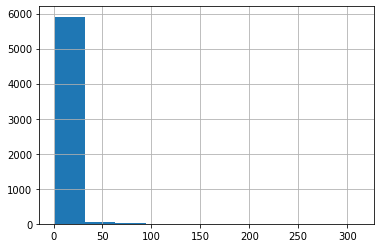

In [ ]:
word_freq['Frequency'].hist()

In [ ]:
#creating word frequency and rank table for Zipf Law
result = pd.DataFrame(word_dist.most_common(word_dist.B()),
                    columns=['Word', 'Frequency'])
rank = list(range(1, word_dist.B()+1))
result['rank'] = rank
result

,Word,Frequency,rank
0,tesla,312,1
1,amp,219,2
2,model,208,3
3,good,171,4
4,rocket,149,5
...,...,...,...
5998,vlad,1,5999
5999,rink,1,6000
6000,nuys,1,6001
6001,ignore,1,6002


Log Log Plot

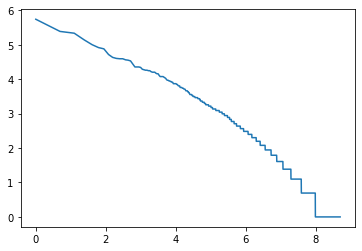

In [ ]:
x = np.log(result['rank'])
y = np.log(result['Frequency'])
plt.plot(x, y)

In [ ]:
#creating bigram
tokens = nltk.word_tokenize(tweet_token)
bigrams = nltk.bigrams(tokens)
bigram_dist = nltk.FreqDist(bigrams)
df_bigram = pd.DataFrame(bigram_dist.most_common(15),columns=['Bigram', 'Frequency'])
bigram =df_bigram.set_index('Bigram').T.to_dict('records')

Bigram Network Graph

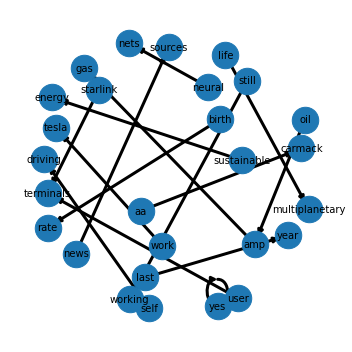

In [100]:
#Creating network plot 
G = nx.DiGraph()
for k, v in bigram[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
fig, ax = plt.subplots(figsize=(5,5))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=3,arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()    

2018 DATA

In [ ]:
df_2018_tweets=df_2018.tweet.to_frame()
df_2018_tweets

,tweet
0,@Ben757677 @vincent13031925 Thanks Tesla owner...
1,"@Grimezsz Turns out if you take Dayquil, you e..."
2,Excited to have Larry Ellison &amp; Kathleen W...
3,@NutmegTheRed @Tesla Ok
4,@westcoastbill Tesla team did a great job!
...,...
2280,"Gonna put an old school drive-in, roller skate..."
2281,https://t.co/3k71xzDIP1
2282,Falcon Heavy goes vertical https://t.co/uG1k0...
2283,Using a neural net to detect rain using camera...


In [ ]:
##preprocessing tweets
index=0
for tweet in df_2018_tweets["tweet"]:
  tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split()) #removing mentions and hashtags
  tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split()) #removing URLs
  tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split()) #removing punctuations
  tweet = tweet.lower() #converting to lower case
  df_2018_tweets.at[index,'tweet'] = tweet
  index=index+1
df_2018_tweets['tweet'] = df_2018_tweets['tweet'].str.replace('[^a-z]', ' ', flags=re.UNICODE,regex=True) #removing emojis and special characters 

In [ ]:
#removing stopwords
stop_words = stopwords.words('english')
df_2018_tweets['tweet'] = df_2018_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df_2018_tweets

,tweet
0,thanks tesla owners china looking forward visi...
1,turns take dayquil exit matrix
2,excited larry ellison amp kathleen wilson thom...
3,ok
4,tesla team great job
...,...
2280,gonna put old school drive roller skates amp r...
2281,
2282,falcon heavy goes vertical
2283,using neural net detect rain using cameras ded...


In [ ]:
#tokenizing words
tweet_token = df_2018_tweets['tweet'].str.cat(sep=' ')
tweet_words = nltk.tokenize.word_tokenize(tweet_token)
word_dist = nltk.FreqDist(tweet_words)

Word Frequencies

In [ ]:
word_freq = pd.DataFrame(word_dist.most_common(word_dist.B()),columns=['Word', 'Frequency'])
word_freq

,Word,Frequency
0,amp,527
1,tesla,291
2,car,121
3,yes,108
4,good,102
...,...,...
5252,restaurant,1
5253,vertical,1
5254,river,1
5255,sierra,1


Top 10 Words

In [ ]:
top10_freq_words = pd.DataFrame(word_dist.most_common(10),columns=['Word', 'Frequency'])
top10_freq_words

,Word,Frequency
0,amp,527
1,tesla,291
2,car,121
3,yes,108
4,good,102
5,model,98
6,like,95
7,would,77
8,people,74
9,even,65


Histogram of Word Frequencies

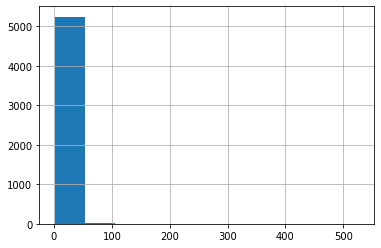

In [ ]:
word_freq['Frequency'].hist()

In [ ]:
#creating word frequency and rank table for Zipf Law
result = pd.DataFrame(word_dist.most_common(word_dist.B()),
                    columns=['Word', 'Frequency'])
rank = list(range(1, word_dist.B()+1))
result['rank'] = rank
result

,Word,Frequency,rank
0,amp,527,1
1,tesla,291,2
2,car,121,3
3,yes,108,4
4,good,102,5
...,...,...,...
5252,restaurant,1,5253
5253,vertical,1,5254
5254,river,1,5255
5255,sierra,1,5256


Log Log Plot

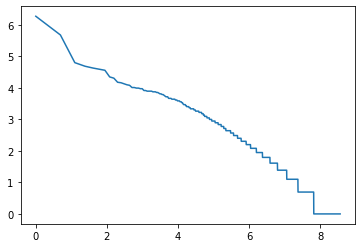

In [ ]:
x = np.log(result['rank'])
y = np.log(result['Frequency'])
plt.plot(x, y)

In [ ]:
#creating bigram
tokens = nltk.word_tokenize(tweet_token)
bigrams = nltk.bigrams(tokens)
bigram_dist = nltk.FreqDist(bigrams)
df_bigram = pd.DataFrame(bigram_dist.most_common(15),columns=['Bigram', 'Frequency'])
bigram =df_bigram.set_index('Bigram').T.to_dict('records')

Bigram Network Graph

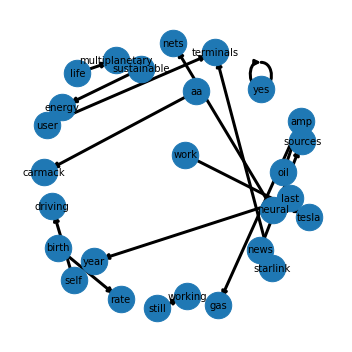

In [101]:
# Create network plot 
G = nx.DiGraph()
for k, v in bigram[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
fig, ax = plt.subplots(figsize=(5,5))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=3,arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()    

2019 DATA

In [ ]:
df_2019_tweets=df_2019.tweet.to_frame()
df_2019_tweets

,tweet
0,@Joe__Wakefield @austinbarnard45 @tjq1190 @tyg...
1,@austinbarnard45 @tjq1190 @tyger_cyber @fawful...
2,@IrinaAntony @tjq1190 @tyger_cyber @fawfulfan ...
3,@tjq1190 @tyger_cyber @fawfulfan @_Mikemo He d...
4,@geofficient Pretty much
...,...
8307,That was a total non sequitur btw
8308,"Great Voltaire quote, arguably better than Twa..."
8309,I made the volume on the Model S http://t.co/...
8310,Went to Iceland on Sat to ride bumper cars on ...


In [ ]:
##preprocessing tweets
index=0
for tweet in df_2019_tweets["tweet"]:
  tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split()) #removing mentions and hashtags
  tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split()) #removing URLs
  tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split()) #removing punctuations
  tweet = tweet.lower() #converting to lower case
  df_2019_tweets.at[index,'tweet'] = tweet
  index=index+1
df_2019_tweets['tweet'] = df_2019_tweets['tweet'].str.replace('[^a-z]', ' ', flags=re.UNICODE,regex=True) #removing emojis and special characters 

In [ ]:
#removing stopwords
stop_words = stopwords.words('english')
df_2019_tweets['tweet'] = df_2019_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df_2019_tweets

,tweet
0,wakefield cyber mikemo pretty awful lie left s...
1,cyber mikemo person blocked read tweet whats deal
2,cyber mikemo started zip k plus overclocked ho...
3,cyber mikemo emerald mine amp worked way colle...
4,pretty much
...,...
8307,total non sequitur btw
8308,great voltaire quote arguably better twain hea...
8309,made volume model go need work miniature stone...
8310,went iceland sat ride bumper cars ice country ...


In [ ]:
#tokenizing words
tweet_token = df_2019_tweets['tweet'].str.cat(sep=' ')
tweet_words = nltk.tokenize.word_tokenize(tweet_token)
word_dist = nltk.FreqDist(tweet_words)

Word Frequencies

In [ ]:
word_freq = pd.DataFrame(word_dist.most_common(word_dist.B()),columns=['Word', 'Frequency'])
word_freq

,Word,Frequency
0,amp,1218
1,tesla,853
2,yes,393
3,model,373
4,good,358
...,...,...
9833,premature,1
9834,stonehenge,1
9835,vlad,1
9836,rink,1


Top 10 Words

In [ ]:
top10_freq_words = pd.DataFrame(word_dist.most_common(10),columns=['Word', 'Frequency'])
top10_freq_words

,Word,Frequency
0,amp,1218
1,tesla,853
2,yes,393
3,model,373
4,good,358
5,like,315
6,car,287
7,would,275
8,great,243
9,time,224


Histogram of Word Frequencies

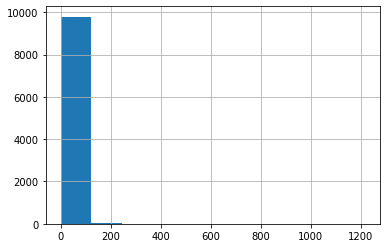

In [ ]:
word_freq['Frequency'].hist()

In [ ]:
#creating word frequency and rank table for Zipf Law
result = pd.DataFrame(word_dist.most_common(word_dist.B()),
                    columns=['Word', 'Frequency'])
rank = list(range(1, word_dist.B()+1))
result['rank'] = rank
result

,Word,Frequency,rank
0,amp,1218,1
1,tesla,853,2
2,yes,393,3
3,model,373,4
4,good,358,5
...,...,...,...
9833,premature,1,9834
9834,stonehenge,1,9835
9835,vlad,1,9836
9836,rink,1,9837


Log Log Plot

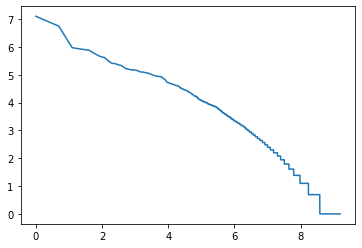

In [ ]:
x = np.log(result['rank'])
y = np.log(result['Frequency'])
plt.plot(x, y)

In [ ]:
tokens = nltk.word_tokenize(tweet_token)
bigrams = nltk.bigrams(tokens)
bigram_dist = nltk.FreqDist(bigrams)
df_bigram = pd.DataFrame(bigram_dist.most_common(15),columns=['Bigram', 'Frequency'])
bigram =df_bigram.set_index('Bigram').T.to_dict('records')

Bigram Network Graph

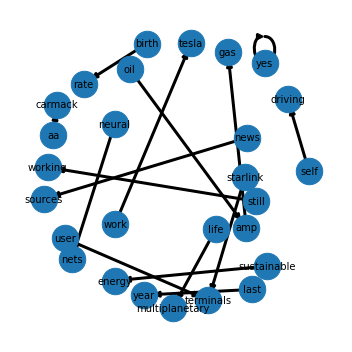

In [102]:
# Create network plot 
G = nx.DiGraph()
for k, v in bigram[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
fig, ax = plt.subplots(figsize=(5,5))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=3,arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()  

2020 DATA

In [ ]:
df_2020_tweets=df_2020.tweet.to_frame()
df_2020_tweets

,tweet
0,Entertainment will be critical when cars drive...
1,@kimpaquette Just meeting with Larry Ellison t...
2,@richierichhhhh_ Absolutely
3,What should Tesla do with in-car gaming in an ...
4,@PPathole @WSJ Absolutely
...,...
11712,That was a total non sequitur btw
11713,"Great Voltaire quote, arguably better than Twa..."
11714,I made the volume on the Model S http://t.co/...
11715,Went to Iceland on Sat to ride bumper cars on ...


In [ ]:
##preprocessing tweets
index=0
for tweet in df_2020_tweets["tweet"]:
  tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split()) #removing mentions and hashtags
  tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split()) #removing URLs
  tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split()) #removing punctuations
  tweet = tweet.lower() #converting to lower case
  df_2020_tweets.at[index,'tweet'] = tweet
  index=index+1
df_2020_tweets['tweet'] = df_2020_tweets['tweet'].str.replace('[^a-z]', ' ', flags=re.UNICODE) #removing emojis and special characters 

<ipython-input-64-86667f954e8b>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2020_tweets['tweet'] = df_2020_tweets['tweet'].str.replace('[^a-z]', ' ', flags=re.UNICODE) #removing emojis and special characters


In [ ]:
#removing stopwords
stop_words = stopwords.words('english')
df_2020_tweets['tweet'] = df_2020_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df_2020_tweets

,tweet
0,entertainment critical cars drive
1,meeting larry ellison seek advice back working...
2,absolutely
3,tesla car gaming autonomous world
4,absolutely
...,...
11712,total non sequitur btw
11713,great voltaire quote arguably better twain hea...
11714,made volume model go need work miniature stone...
11715,went iceland sat ride bumper cars ice country ...


In [ ]:
#tokenizing words
tweet_token = df_2020_tweets['tweet'].str.cat(sep=' ')
tweet_words = nltk.tokenize.word_tokenize(tweet_token)
word_dist = nltk.FreqDist(tweet_words)

Word Frequencies

In [ ]:
word_freq = pd.DataFrame(word_dist.most_common(word_dist.B()),columns=['Word', 'Frequency'])
word_freq

,Word,Frequency
0,amp,1822
1,tesla,1060
2,yes,554
3,good,471
4,model,404
...,...,...
11605,premature,1
11606,stonehenge,1
11607,vlad,1
11608,rink,1


Top 10 Words

In [ ]:
top10_freq_words = pd.DataFrame(word_dist.most_common(10),columns=['Word', 'Frequency'])
top10_freq_words

,Word,Frequency
0,amp,1822
1,tesla,1060
2,yes,554
3,good,471
4,model,404
5,like,395
6,great,372
7,would,371
8,car,329
9,much,310


Histogram of Word Frequencies

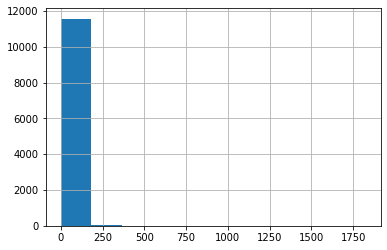

In [ ]:
word_freq['Frequency'].hist()

In [ ]:
#creating word frequency and rank table for Zipf Law
result = pd.DataFrame(word_dist.most_common(word_dist.B()),
                    columns=['Word', 'Frequency'])
rank = list(range(1, word_dist.B()+1))
result['rank'] = rank
result

,Word,Frequency,rank
0,amp,1822,1
1,tesla,1060,2
2,yes,554,3
3,good,471,4
4,model,404,5
...,...,...,...
11605,premature,1,11606
11606,stonehenge,1,11607
11607,vlad,1,11608
11608,rink,1,11609


Log Log Plot

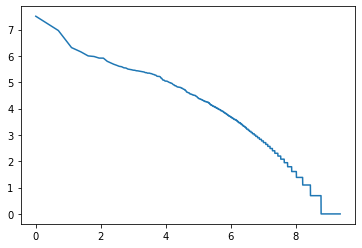

In [ ]:
x = np.log(result['rank'])
y = np.log(result['Frequency'])
plt.plot(x, y)

In [ ]:
tokens = nltk.word_tokenize(tweet_token)
bigrams = nltk.bigrams(tokens)
bigram_dist = nltk.FreqDist(bigrams)
df_bigram = pd.DataFrame(bigram_dist.most_common(15),columns=['Bigram', 'Frequency'])
bigram =df_bigram.set_index('Bigram').T.to_dict('records')

Bigram Network Graph

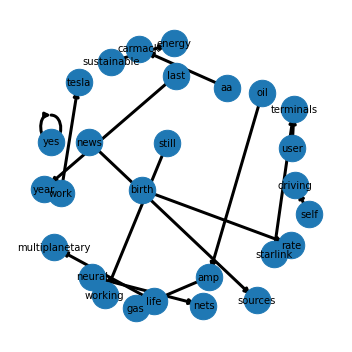

In [103]:
# Create network plot 
G = nx.DiGraph()
for k, v in bigram[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
fig, ax = plt.subplots(figsize=(5,5))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=3,arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()   

2021 DATA

In [ ]:
df_2021_tweets=df_2021.tweet.to_frame()
df_2021_tweets

,tweet
0,@roshanpateI 🤣 $7
1,@tesla_raj Many UI improvements coming
2,@CSmithson80 @heydave7 @BLKMDL3 @mims This cha...
3,@BLKMDL3 @mims Predicting macroeconomics is ch...
4,"@mims If history is any guide, not many will m..."
...,...
3110,@flcnhvy Tesla is responsible for 2/3 of all t...
3111,So proud of the Tesla team for achieving this ...
3112,"@newscientist Um, we have giant fusion reactor..."
3113,@comma_ai Tesla Full Self-Driving will work at...


In [ ]:
##preprocessing tweets
index=0
for tweet in df_2021_tweets["tweet"]:
  tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split()) #removing mentions and hashtags
  tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split()) #removing URLs
  tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split()) #removing punctuations
  tweet = tweet.lower() #converting to lower case
  df_2021_tweets.at[index,'tweet'] = tweet
  index=index+1
df_2021_tweets['tweet'] = df_2021_tweets['tweet'].str.replace('[^a-z]', ' ', flags=re.UNICODE) #removing emojis and special characters

<ipython-input-76-26a551082755>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2021_tweets['tweet'] = df_2021_tweets['tweet'].str.replace('[^a-z]', ' ', flags=re.UNICODE) #removing emojis and special characters


In [ ]:
#removing stopwords
stop_words = stopwords.words('english')
df_2021_tweets['tweet'] = df_2021_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df_2021_tweets

,tweet
0,
1,raj many ui improvements coming
2,chart big deal
3,predicting macroeconomics challenging say leas...
4,history guide many make past next recession
...,...
3110,tesla responsible personal amp professional pa...
3111,proud tesla team achieving major milestone sta...
3112,um giant fusion reactor sky works maintenance
3113,ai tesla full self driving work safety level w...


In [ ]:
#tokenizing words
tweet_token = df_2021_tweets['tweet'].str.cat(sep=' ')
tweet_words = nltk.tokenize.word_tokenize(tweet_token)
word_dist = nltk.FreqDist(tweet_words)

Word Frequencies

In [ ]:
word_freq = pd.DataFrame(word_dist.most_common(word_dist.B()),columns=['Word', 'Frequency'])
word_freq

,Word,Frequency
0,amp,476
1,tesla,237
2,great,102
3,good,98
4,much,93
...,...,...
5051,ranges,1
5052,personal,1
5053,professional,1
5054,optimistically,1


Top 10 Words

In [ ]:
top10_freq_words = pd.DataFrame(word_dist.most_common(10),columns=['Word', 'Frequency'])
top10_freq_words

,Word,Frequency
0,amp,476
1,tesla,237
2,great,102
3,good,98
4,much,93
5,haha,89
6,like,89
7,would,89
8,time,86
9,beta,77


Histogram of Word Frequencies

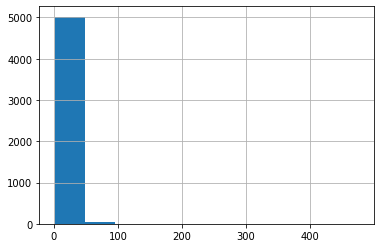

In [ ]:
word_freq['Frequency'].hist()

In [ ]:
#creating word frequency and rank table for Zipf Law
result = pd.DataFrame(word_dist.most_common(word_dist.B()),
                    columns=['Word', 'Frequency'])
rank = list(range(1, word_dist.B()+1))
result['rank'] = rank
result

,Word,Frequency,rank
0,amp,476,1
1,tesla,237,2
2,great,102,3
3,good,98,4
4,much,93,5
...,...,...,...
5051,ranges,1,5052
5052,personal,1,5053
5053,professional,1,5054
5054,optimistically,1,5055


Log Log Plot

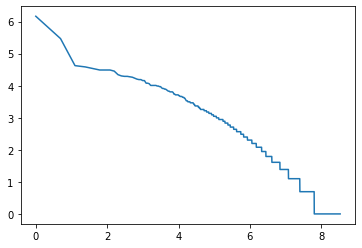

In [ ]:
x = np.log(result['rank'])
y = np.log(result['Frequency'])
plt.plot(x, y)

In [ ]:
tokens = nltk.word_tokenize(tweet_token)
bigrams = nltk.bigrams(tokens)
bigram_dist = nltk.FreqDist(bigrams)
df_bigram = pd.DataFrame(bigram_dist.most_common(15),columns=['Bigram', 'Frequency'])
bigram =df_bigram.set_index('Bigram').T.to_dict('records')

Bigram Network Graph

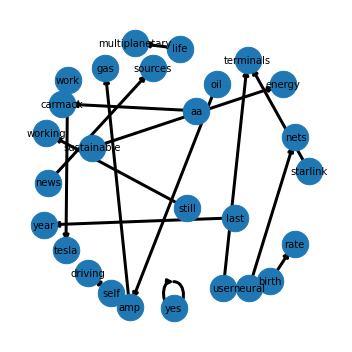

In [104]:
# Create network plot 
G = nx.DiGraph()
for k, v in bigram[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
fig, ax = plt.subplots(figsize=(5,5))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=3,arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show() 

2022 DATA

In [ ]:
df_2022_tweets=df_2022.tweet.to_frame()
df_2022_tweets

,tweet
0,"@SpacePadreIsle In a way, this is free QA haha"
1,@teslaownersSV A beautiful home for life
2,@SpacePadreIsle Some Starlink terminals near c...
3,@RationalEtienne @RogerYar Exactly
4,@RogerYar All news sources are partially propa...
...,...
1023,https://t.co/LA9hPzVlGx
1024,Let’s make the roaring 20’s happen!
1025,Great work by Tesla team worldwide!
1026,@BLKMDL3 @Tesla 🔥


In [ ]:
##preprocessing tweets
index=0
for tweet in df_2022_tweets["tweet"]:
  tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split()) #removing mentions and hashtags
  tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split()) #removing URLs
  tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split()) #removing punctuations
  tweet = tweet.lower() #converting to lower case
  df_2022_tweets.at[index,'tweet'] = tweet
  index=index+1
df_2022_tweets['tweet'] = df_2022_tweets['tweet'].str.replace('[^a-z]', ' ', flags=re.UNICODE) #removing emojis and special characters

<ipython-input-88-694eaad95802>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2022_tweets['tweet'] = df_2022_tweets['tweet'].str.replace('[^a-z]', ' ', flags=re.UNICODE) #removing emojis and special characters


In [ ]:
#removing stopwords
stop_words = stopwords.words('english')
df_2022_tweets['tweet'] = df_2022_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df_2022_tweets

,tweet
0,way free qa haha
1,beautiful home life
2,starlink terminals near conflict areas jammed ...
3,exactly
4,news sources partially propaganda others
...,...
1023,
1024,let make roaring happen
1025,great work tesla team worldwide
1026,


In [ ]:
#tokenizing words
tweet_token = df_2022_tweets['tweet'].str.cat(sep=' ')
tweet_words = nltk.tokenize.word_tokenize(tweet_token)
word_dist = nltk.FreqDist(tweet_words)

Word Frequencies

In [ ]:
word_freq = pd.DataFrame(word_dist.most_common(word_dist.B()),columns=['Word', 'Frequency'])
word_freq

,Word,Frequency
0,amp,80
1,tesla,68
2,people,34
3,would,32
4,yes,32
...,...,...
1471,touch,2
1472,generations,2
1473,age,2
1474,roaring,2


Top 10 Words

In [ ]:
top10_freq_words = pd.DataFrame(word_dist.most_common(10),columns=['Word', 'Frequency'])
top10_freq_words

,Word,Frequency
0,amp,80
1,tesla,68
2,people,34
3,would,32
4,yes,32
5,one,30
6,starlink,28
7,good,28
8,car,26
9,enough,26


Histogram of Word Frequencies

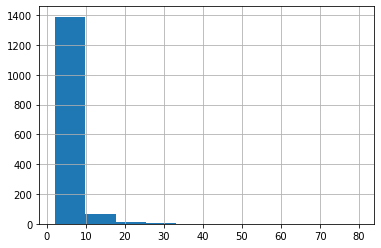

In [ ]:
word_freq['Frequency'].hist()

In [ ]:
#creating word frequency and rank table for Zipf Law
result = pd.DataFrame(word_dist.most_common(word_dist.B()),
                    columns=['Word', 'Frequency'])
rank = list(range(1, word_dist.B()+1))
result['rank'] = rank
result

,Word,Frequency,rank
0,amp,80,1
1,tesla,68,2
2,people,34,3
3,would,32,4
4,yes,32,5
...,...,...,...
1471,touch,2,1472
1472,generations,2,1473
1473,age,2,1474
1474,roaring,2,1475


Log Log Plot

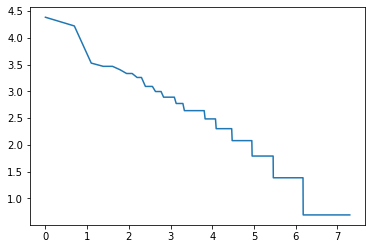

In [ ]:
x = np.log(result['rank'])
y = np.log(result['Frequency'])
plt.plot(x, y)

In [ ]:
tokens = nltk.word_tokenize(tweet_token)
bigrams = nltk.bigrams(tokens)
bigram_dist = nltk.FreqDist(bigrams)
df_bigram = pd.DataFrame(bigram_dist.most_common(15),columns=['Bigram', 'Frequency'])
bigram =df_bigram.set_index('Bigram').T.to_dict('records')

Bigram Network Graph

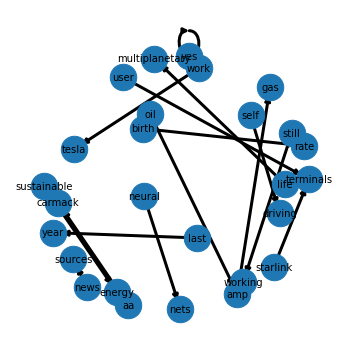

In [105]:
# Create network plot 
G = nx.DiGraph()
for k, v in bigram[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
fig, ax = plt.subplots(figsize=(5,5))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=3,arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()   